# Parcial I - M√©todos Computacionales

**2025-1**

---

Nombre: Ana Paulina Olivares √Ålvarez

Identificaci√≥n: 1000192042

---

* ‚ö† Explique su c√≥digo usando con comentarios,

* ‚ùóTodas las funciones deben tener documentaci√≥n b√°sica,

* üõë El uso de IA's no est√° permitido,

* ‚öõ La interpretaci√≥n del enunciado hace parte de la evaluaci√≥n,

* ‚è≤ Este parcial tiene una duraci√≥n de 2 horas

In [ ]:
# Librerias √∫tiles
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import factorial
from scipy.optimize import root_scalar, newton, bisect # Funciones para raices

## Ayudas
# np.sign (Signo de una variable)
# np.deg2rad (Convertir grados a radianes)
# pd.Dataframe Genera un dataframe a partir de un diccionario o listas
# range(0, 10, 2) (Pasos de 2 comenzando en 0 hasta 10)

# 1

**(40 puntos)** El **m√©todo de Ridder** es un algoritmo de b√∫squeda de ra√≠ces que, como la bisecci√≥n, requiere un intervalo $[a, b]$ tal que $f(a) \cdot f(b) < 0$. A diferencia de la bisecci√≥n, Ridder introduce una correcci√≥n exponencial para acelerar la convergencia, logrando **convergencia cuadr√°tica** sin requerir derivadas.

---
### Pasos para implementar

1. **Definir la funci√≥n** $f(x)$ y un intervalo $[a, b]$ tal que:

   - $f(a) \cdot f(b) < 0$ (la funci√≥n tiene signos opuestos en los extremos del intervalo).
   - La funci√≥n debe ser continua en $[a, b]$.

2. **Calcular el punto medio**:

   $$
   m = \frac{a + b}{2}
   $$

3. **Calcular la correcci√≥n exponencial**:

   - Evaluar $f(a)$, $f(b)$ y $f(m)$.
   - Calcular:

     $$
     s = \sqrt{f(m)^2 - f(a) f(b)}
     $$

   - Si $s = 0$, detener: la ra√≠z no puede estimarse en esta iteraci√≥n.

   - Calcular el nuevo candidato a ra√≠z:

     $$
     x = m + \frac{(m - a) f(m)}{s} \cdot \text{sign}(f(a) - f(b))
     $$

4. **Evaluar $f(x)$** y actualizar el intervalo:

   - Si $f(m) \cdot f(x) < 0$, entonces la nueva ra√≠z est√° entre $m$ y $x$.
   - Si $f(a) \cdot f(x) < 0$, entonces actualizar $b = x$, luego $f(b) = f(x)$.
   - Si $f(b) \cdot f(x) < 0$, entonces actualizar $a = x$, luego $f(a) = f(x)$.
   - En cada paso mantener la condici√≥n $f(a) \cdot f(b) < 0$.

5. **Criterio de parada**:

   - Repetir los pasos anteriores hasta que se alcance la tolerancia deseada:

     $$
     |f(x)| < \varepsilon \quad \text{o} \quad |b - a| < \delta
     $$

   donde $\varepsilon$ y $\delta$ son tolerancias establecidas por el usuario.

---

* Defina una funci√≥n llamada `Ridder` que calcule la raiz de una funci√≥n dada. Su funci√≥n debe tener documentaci√≥n y retornar el valor de la raiz junto con el n√∫mero de iteraciones empleadas para alcanzar la convergencia dada una tolerancia.

* Usando
$$\cos(x) = x,$$

Grafique la funci√≥n para $0\leq x \leq \pi/2$ usando 100 puntos. Luego, cree un DataFrame con los datos de $x$ y $f(x)$, y encuentre una primera aproximaci√≥n a la raiz aplicando un filtro en el dataframe con los valores m√°s cercanos a cero.

* Usando el m√©todo de Ridder encuentre la raiz n√∫mericamente y compare su resultado usando el m√©todo de bisecci√≥n y secante.

* Para las siguientes tolerancias (ver c√≥digo) realice un gr√°fico usando escala logaritimica en $y$ de cuantas iteraciones son necesarias hasta alcanzar la convergencia. ¬øQu√© puede concluir acerca de la misma?

```python
# Tolerancias
tol = np.logspace(-1, -20, 20)

# Grafico semilog

plt.semilogy(N, tol)

```

In [ ]:
def ridder(f, a, b, tol = 1e-6, maxiter = 100):

  '''
  Determina la ra√≠z por el m√©todo de Ridder
  Entradas:
  f: funci√≥n a evaluar
  a: n√∫mero
  b: n√∫mero
  Retorna:
  x: ra√≠z aproximada
  '''

  if f(a) * f(b) > 0:
    raise ValueError('En el intervalo no hay ra√≠z')
  else:
    for i in range(maxiter):
      m = (a + b) / 2 # Calcular el punto medio
      fa, fb, fm = f(a), f(b), f(m)

      # Calcular la correci√≥n exponencial
      radicando = fm ** 2 - fa * fb
      if radicando < 0:
        print('La ra√≠z es imaginaria')
        break
      s = np.sqrt(radicando)
      if s == 0:
        print('La ra√≠z no puede estimarse')
      # Nuevo candidato a ra√≠z
      x = m + ((m - a) * fm )/ s * np.sign(fa - fb)
      fx = f(x)

      # Evaluar y actualizar intervalo
      if fm * fx < 0:
        a, b = m, x
      elif fa * fx < 0:
        b = x
      elif fb * fx < 0:
        a = x
      else:
        return x, i + 1

      # Criterio de parada
      if abs(fx) < tol or abs(b - a) < tol:
        return x, i + 1

  raise RuntimeError('M√°ximo de iteraciones alcanzado')

In [ ]:
f = lambda x: np.cos(x) - x
raiz, iteraciones = ridder(f, 0, np.pi/2, tol = 1e-6)
print(f'La ra√≠z es: {raiz}, encontrada en {iteraciones} iteraciones')

La ra√≠z es: 0.7390848878903102, encontrada en 2 iteraciones


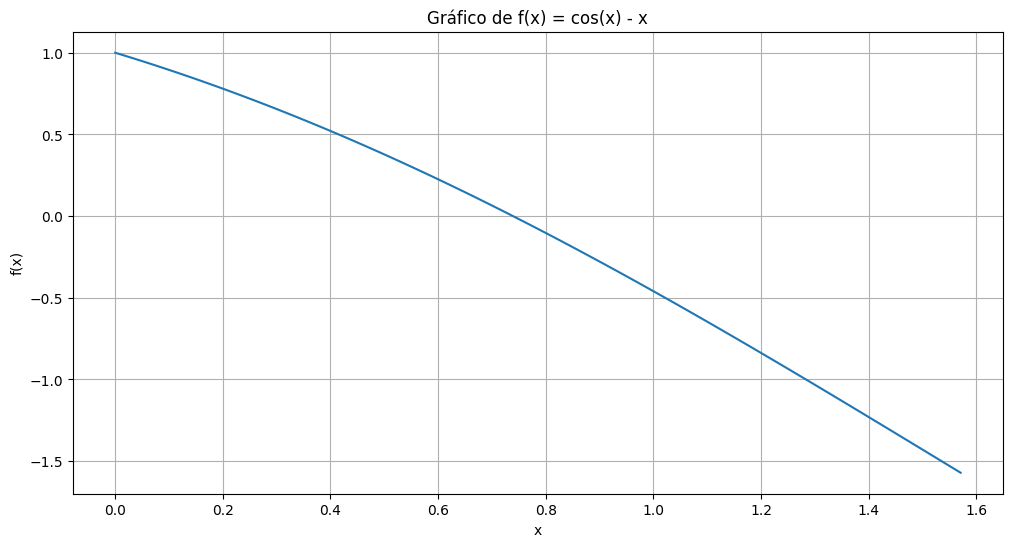

In [ ]:
x1 = np.linspace(0, np.pi/2, 100)
y = f(x1)

plt.figure(figsize=(12, 6))
plt.plot(x1, y, label='f(x) = cos(x) - x')
plt.title('Gr√°fico de f(x) = cos(x) - x')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.show()

In [ ]:
df = pd.DataFrame({'x': x1, 'f(x)': y})
print(df[(df['f(x)'] < 0.1) & (df['f(x)'] > -0.1)]) # Encuentra valor cercano a la ra√≠z

           x      f(x)
43  0.682265  0.093881
44  0.698132  0.067913
45  0.713998  0.041751
46  0.729865  0.015399
47  0.745732 -0.011140
48  0.761598 -0.037864
49  0.777465 -0.064771
50  0.793331 -0.091857


In [ ]:
bisect?

In [ ]:
newton?

In [ ]:
a = 0
b = np.pi/2

# M√©todo Ridder
raiz_ridder = ridder(f, a, b, tol= 1e-6)
print(f'Ra√≠z por m√©todo de Ridder = {raiz_ridder}')

# M√©todo Bisecci√≥n
raiz_biseccion = bisect(f, a, b)
print(f'Ra√≠z por m√©todo de Bisecci√≥n = {raiz_biseccion}')

# M√©todo Secante
raiz_secante = newton(f, x0 = a, x1 = b)
print(f'Ra√≠z por M√©todo de Secante = {raiz_secante}')

Ra√≠z por m√©todo de Ridder = (np.float64(0.7390848878903102), 2)
Ra√≠z por m√©todo de Bisecci√≥n = 0.7390851332152737
Ra√≠z por M√©todo de Secante = 0.7390851332151607


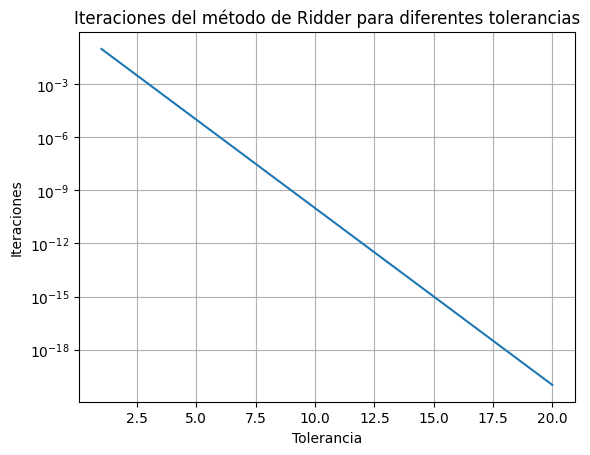

In [ ]:
tolerancia = np.logspace(-1, -20, 20)

lista = [] # Guarda cu√°ntas iteraciones necesita el m√©todo

for tol in tolerancia:
  n = ridder(f, a, b, tol = tol) # n es la cantidad de iteraciones que se necesitaron
  lista.append(n)

N = np.arange(1, len(tolerancia) + 1)
plt.semilogy(N, tolerancia)
plt.xlabel('Tolerancia')
plt.ylabel('Iteraciones')
plt.title('Iteraciones del m√©todo de Ridder para diferentes tolerancias')
plt.grid(True)
plt.show()


#2

**(60 puntos)** En √≥ptica, cuando un rayo de luz atraviesa la interfaz entre dos medios con diferentes √≠ndices de refracci√≥n, su direcci√≥n cambia seg√∫n la ley de Snell. Para el caso de un prisma triangular, cuando un rayo emerge despu√©s de dos refracciones, el √°ngulo de desviaci√≥n total $\delta$ est√° dado por:

$$\delta(\theta_i) = \theta_i + \arcsin\left(n\sin\left(A - \arcsin\left(\frac{\sin\theta_i}{n}\right)\right)\right) - A$$

donde $\theta_i$ es el √°ngulo de incidencia, $n$ es el √≠ndice de refracci√≥n del prisma y $A$ es el √°ngulo del prisma.

La derivada de esta funci√≥n con respecto al √°ngulo de incidencia $\theta_i$ es:

$$\frac{d\delta}{d\theta_i} = 1 - \frac{\cos\theta_i \cdot \cos(A-\theta_r)}{\cos\theta_r \cdot \sqrt{1-n^2\sin^2(A-\theta_r)}}$$

donde $\theta_r = \arcsin\left(\frac{\sin\theta_i}{n}\right)$ es el √°ngulo de refracci√≥n en la primera interfaz.

Considere un prisma de vidrio crown con $n = 1.52$ y $A = 60¬∞$.

### Parte A:
* Escriba una funci√≥n explicita y documentada para $\frac{d\delta}{d\theta_i}$

* Realice un gr√°fico para $\frac{d\delta}{d\theta_i}$ y encuentre el √°ngulo de incidencia $\theta_i$ que produce el √°ngulo de desviaci√≥n m√≠nimo para $\theta_i \in [30¬∞, 80¬∞]$.

* Use el m√©todo de Newton-Raphson (sin derivada) y el m√©todo de la secante para hallar el √°ngulo de desviaci√≥n m√≠nimo.


### Parte B:
* Determine el √°ngulo cr√≠tico $\theta_c$ para el cual el rayo comienza a experimentar reflexi√≥n interna total en la segunda interfaz del prisma. Esta condici√≥n ocurre cuando:

$$\sin(A - \theta_r) = \frac{1}{n}$$

* Resuelva num√©ricamente la ecuaci√≥n anterior para encontrar el √°ngulo de incidencia $\theta_i$ correspondiente a este √°ngulo cr√≠tico, utilizando el m√©todo de la bisecci√≥n.





(60 puntos) En √≥ptica, cuando un rayo de luz atraviesa la interfaz entre dos medios con diferentes √≠ndices de refracci√≥n, su direcci√≥n cambia seg√∫n la ley de Snell. Para el caso de un prisma triangular, cuando un rayo emerge despu√©s de dos refracciones, el √°ngulo de desviaci√≥n total  Œ¥  est√° dado por:

Œ¥(Œ∏i)=Œ∏i+arcsin(nsin(A‚àíarcsin(sinŒ∏in)))‚àíA

donde  Œ∏i  es el √°ngulo de incidencia,  n  es el √≠ndice de refracci√≥n del prisma y  A  es el √°ngulo del prisma.

In [ ]:
n = 1.52
A = np.deg2rad(60)

def delta(theta):